##Grad-CAM-based Heat Mapping Application for Membrane Segmentation using U-Net

### Import Libraries

In [1]:
import sys
sys.path.append('unet')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import data as d
import model as m

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from keras import backend as K
%matplotlib inline

In [3]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Train Network

In [6]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=False,
                    fill_mode='nearest')
myGene = d.trainGenerator(2,'unet/data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = m.unet()
model_checkpoint = m.ModelCheckpoint('unet/unet_membrane.hdf5', monitor='loss',verbose=3, save_best_only=True)

In [7]:
model.fit_generator(myGene,steps_per_epoch=500,epochs=5,callbacks=[model_checkpoint], verbose=3)     #faster training

Epoch 1/5
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.

Epoch 00001: loss improved from inf to 0.30597, saving model to unet/unet_membrane.hdf5
Epoch 2/5

Epoch 00002: loss improved from 0.30597 to 0.24085, saving model to unet/unet_membrane.hdf5
Epoch 3/5

Epoch 00003: loss improved from 0.24085 to 0.21846, saving model to unet/unet_membrane.hdf5
Epoch 4/5

Epoch 00004: loss improved from 0.21846 to 0.20371, saving model to unet/unet_membrane.hdf5
Epoch 5/5

Epoch 00005: loss improved from 0.20371 to 0.19149, saving model to unet/unet_membrane.hdf5


In [8]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

### Test Model & Save Prediction Results

In [9]:
testGene = d.testGenerator("unet/data/membrane/test")
model = m.unet()
model.load_weights("unet/unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=3)
d.saveResult("unet/data/membrane/test",results)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

### Visualize Heatmap on Predicted Image

0
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_4:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


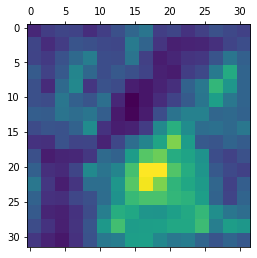

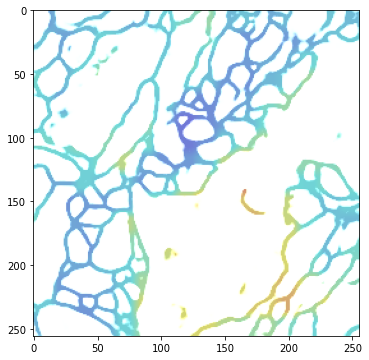

1
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_9:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


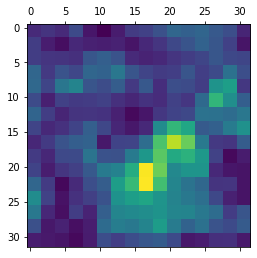

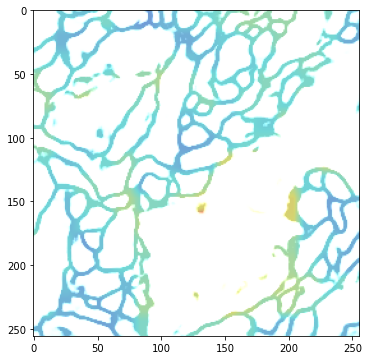

2
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_14:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


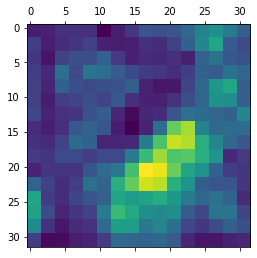

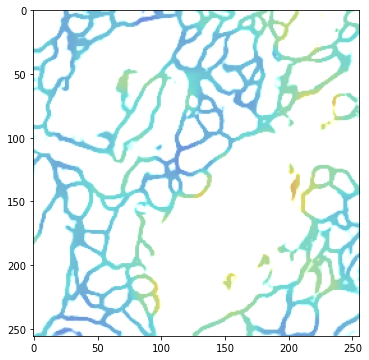

3
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_19:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


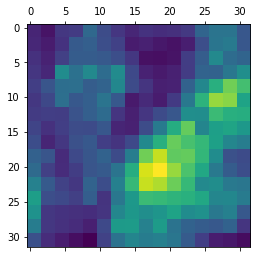

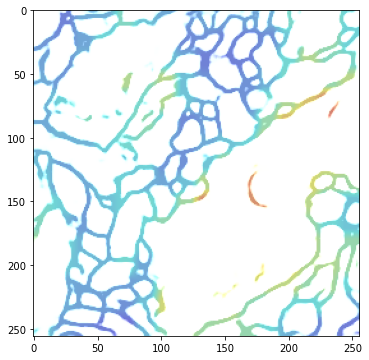

4
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_24:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


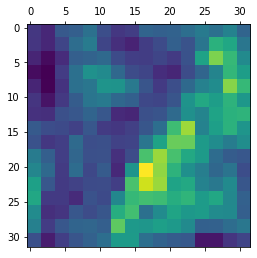

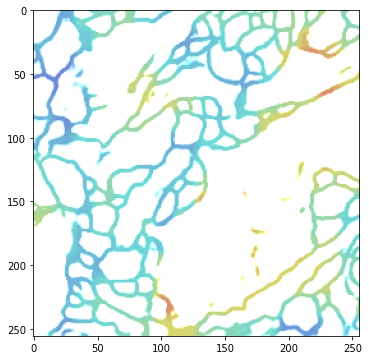

5
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_29:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


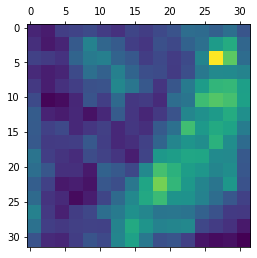

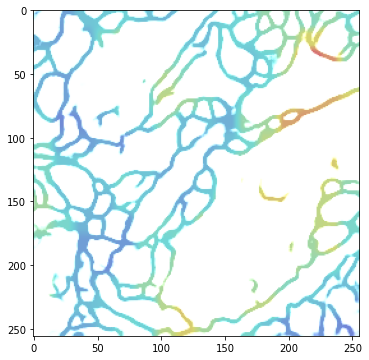

6
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_34:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


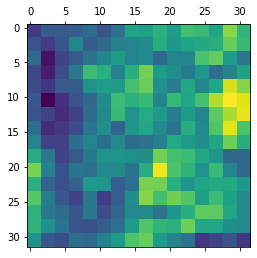

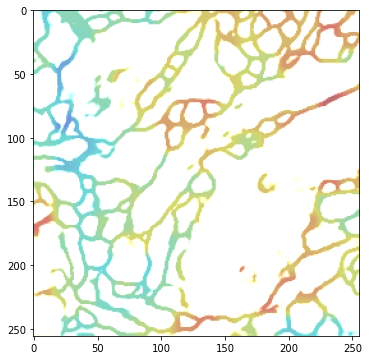

7
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_39:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


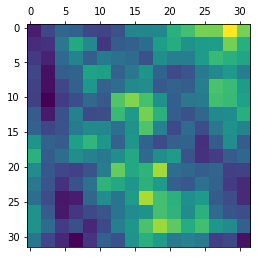

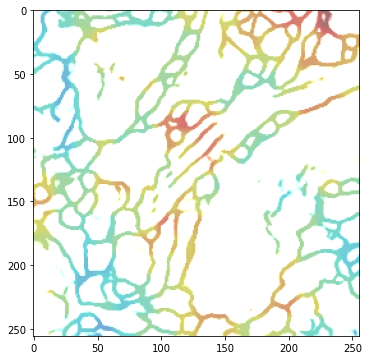

8
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_44:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


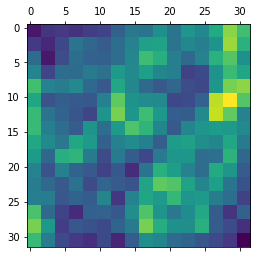

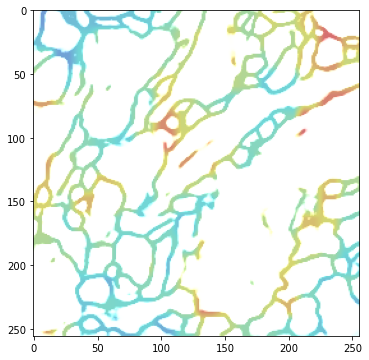

9
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_49:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


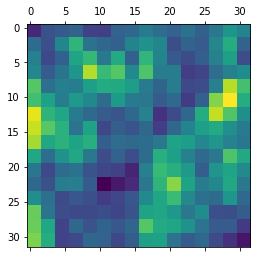

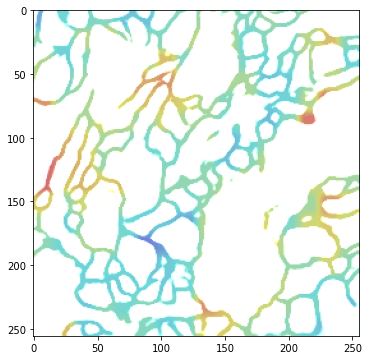

10
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_54:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


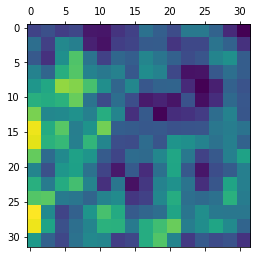

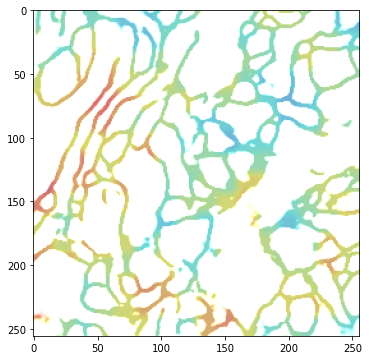

11
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_59:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


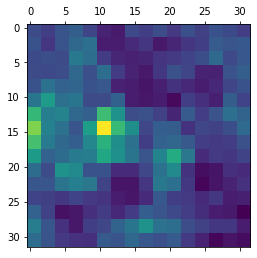

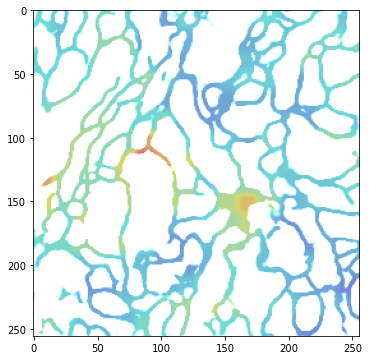

12
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_64:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


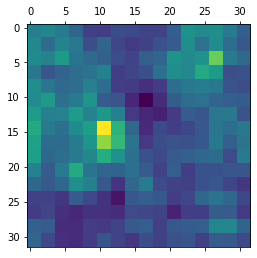

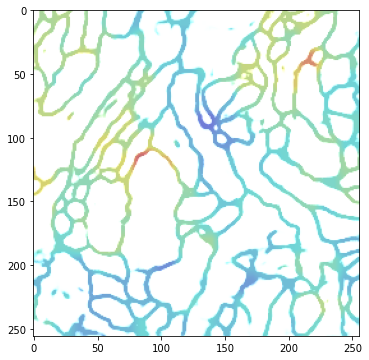

13
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_69:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


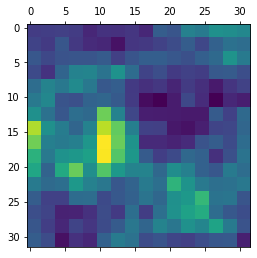

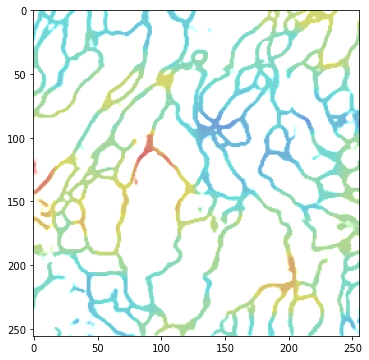

14
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_74:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


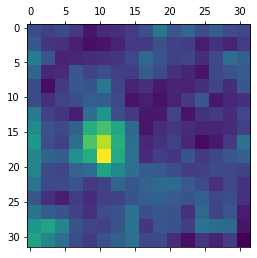

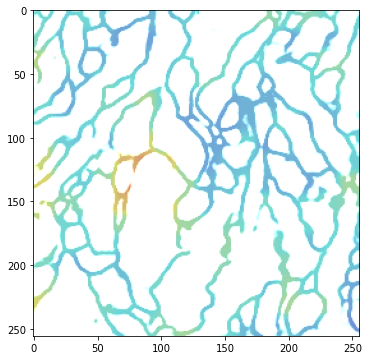

15
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_79:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


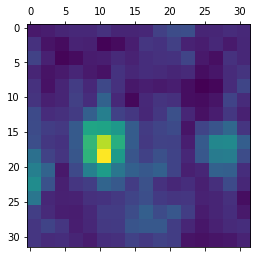

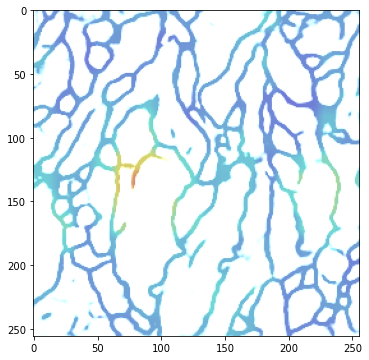

16
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_84:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


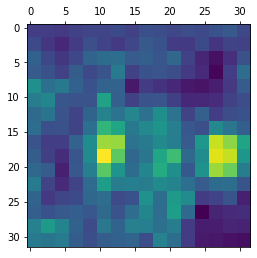

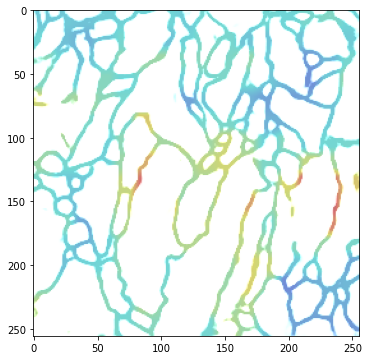

17
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_89:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


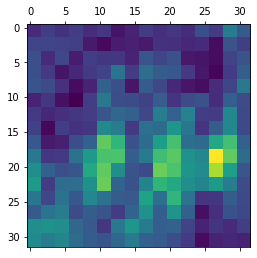

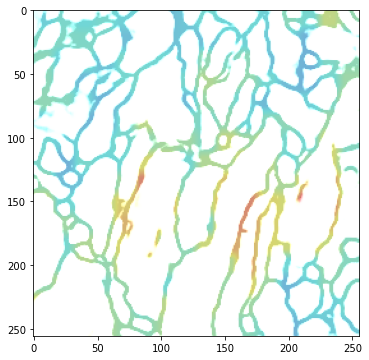

18
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_94:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


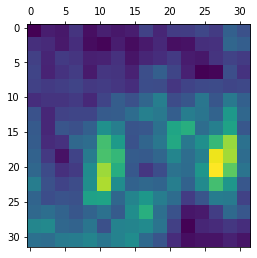

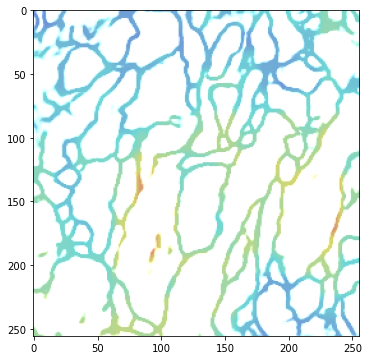

19
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_99:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


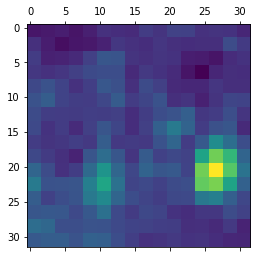

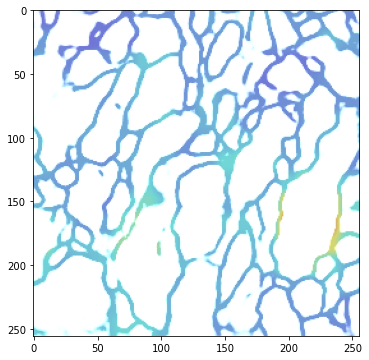

20
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_104:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


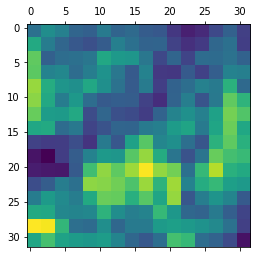

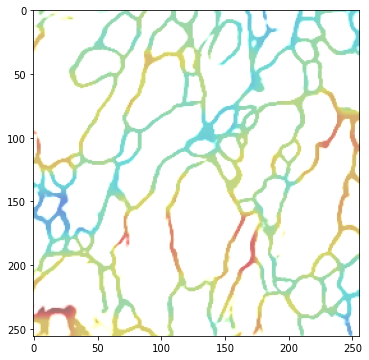

21
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_109:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


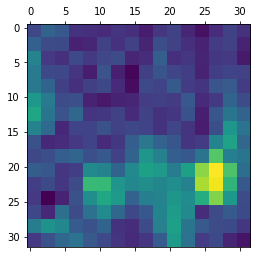

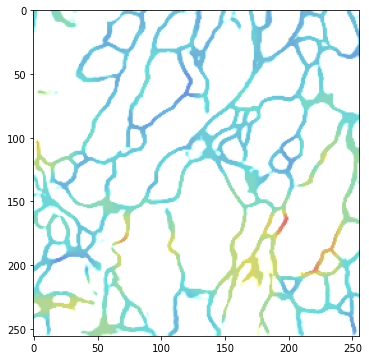

22
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_114:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


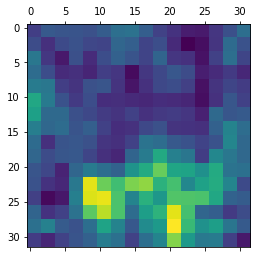

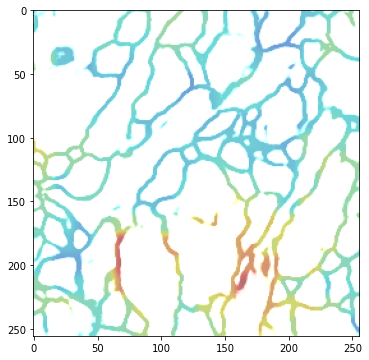

23
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_119:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


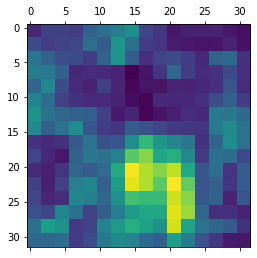

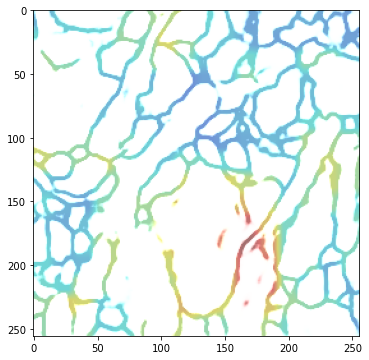

24
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_124:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


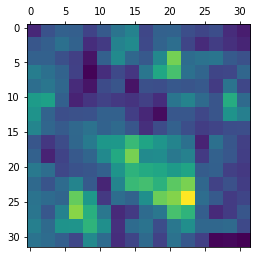

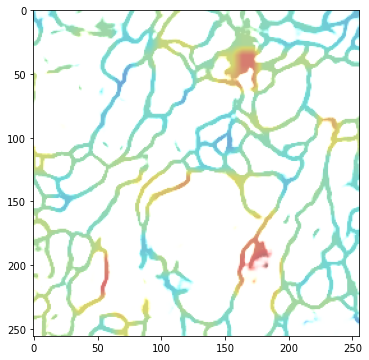

25
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_129:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


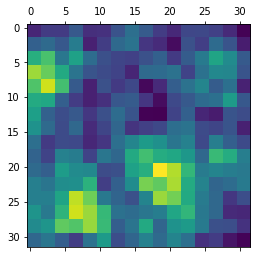

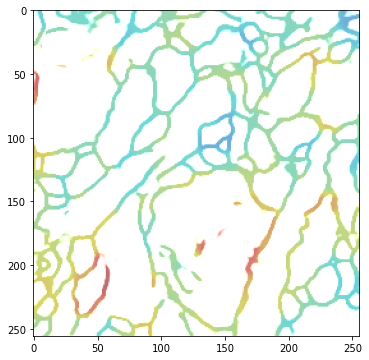

26
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_134:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


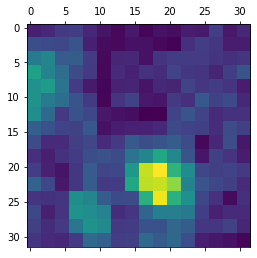

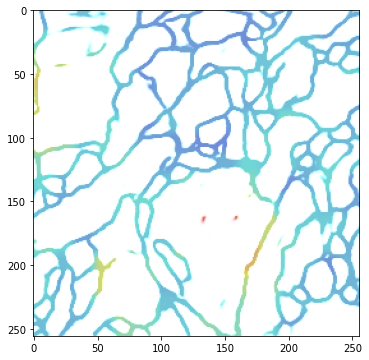

27
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_139:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


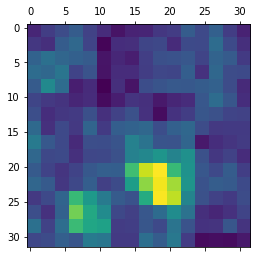

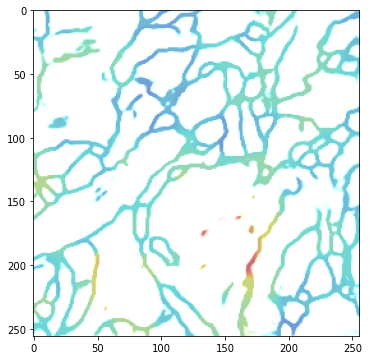

28
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_144:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


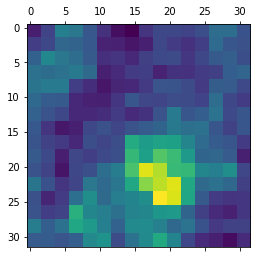

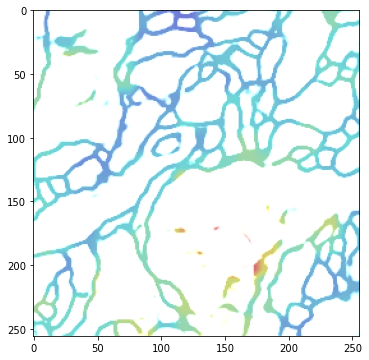

29
img_pred_shape =  (None, 256, 1)
grads_shape =  (None, 32, 32, 1024)
model.input_shape =  (None, 256, 256, 1)
pooled_grads_shape =  (1024,)
last_conv_layer.output[0]_shape =  (32, 32, 1024)
Tensor("strided_slice_149:0", shape=(), dtype=float32)
x_shape =  (1, 256, 256, 1)
pooled_grads_value_shape =  (1024,)
conv_layer_output_value_shape =  (32, 32, 1024)
heatmap_shape =  (32, 32)


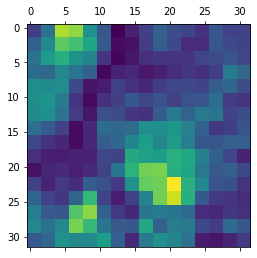

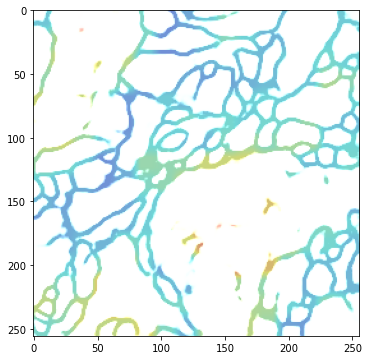

In [10]:
from keras.preprocessing import image
import numpy as np

for j in range (0,30):
  im_name = str(j)
  print(im_name)
  
  # The local path to our target image
  test_path = "C:\\Users\\chung\\Desktop\\membrane segmentation unet\\unet\\data\\membrane\\test\\"
  path = test_path + im_name + '.png'

  # `img` is a PIL image of size 256 x 256
  img = image.load_img(path, target_size=(256, 256), color_mode="grayscale") #adjust according to model.summary input layer

  # `x` is a float32 Numpy array of shape (256, 256, 1)
  x = image.img_to_array(img)

  # We add a dimension to transform our array into a "batch"
  # of size (1, 256, 256, 1)
  x = np.expand_dims(x, axis=0)

  ####GENERATE HEATMAP
  import cv2

  # Predicted image
  im_pred = model.output[:, 0] #index = 0 since there is only 1 output from the network
  print("img_pred_shape = ", im_pred.shape)

  # The output feature map of the `xxx` layer,
  # The last convolutional layer in model
  last_conv_layer = model.get_layer('up_sampling2d_5')

  #=========DEPENDING ON LAYER, pooled_grads size varies, thus below range varies

  # This is the gradient of the "membrane" class with regard to
  # the output feature map of `xxx`
  grads = K.gradients(im_pred, last_conv_layer.output)[0]
  print("grads_shape = ", grads.shape)
  # This is a vector of shape (512,), where each entry
  # is the mean intensity of the gradient over a specific feature map channel
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  # This function allows us to access the values of the quantities we just defined:
  # `pooled_grads` and the output feature map of `xxx`,
  # given a sample image
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  print("model.input_shape = ", model.input.shape) ####input_shape should align with x_shape
  print("pooled_grads_shape = ", pooled_grads.shape)
  print("last_conv_layer.output[0]_shape = ", last_conv_layer.output[0].shape)
  a = [pooled_grads, last_conv_layer.output[0]]
  print(pooled_grads[1])
  # These are the values of these two quantities, as Numpy arrays
  print("x_shape = ", x.shape)                     ####input_shape should align with x_shape
  pooled_grads_value, conv_layer_output_value = iterate([x])
  print("pooled_grads_value_shape = ", pooled_grads_value.shape)
  print("conv_layer_output_value_shape = ", conv_layer_output_value.shape)
  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the membrane class
  #=========DEPENDING ON LAYER, pooled_grads size varies, thus below range varies
  for i in range(512):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # The channel-wise mean of the resulting feature map
  # is our heatmap of class activation
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  print("heatmap_shape = ", heatmap.shape)

  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  plt.matshow(heatmap)
    
  # Save heatmap to disk
  heat_path = test_path + im_name + '_heatmap.png'
  plt.savefig(heat_path)

  ####GENERATE HEATMAP
 
  img_path = test_path + im_name + "_predict.png"
  img_heat_path = test_path + im_name + "_heat_predict.png"
    
  # We use cv2 to load the original image
  img = cv2.imread(img_path)

  # We resize the heatmap to have the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)

  # We apply the heatmap to the original image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  # 0.4 here is a heatmap intensity factor
  superimposed_img = heatmap * 0.4 + img

  # Save the image to disk
  cv2.imwrite(img_heat_path, superimposed_img)

  from PIL import Image
  im = Image.open(img_heat_path)
  fig=plt.figure(figsize=(8, 6))
  plt.imshow(im)
  plt.show()